# Durstexpress data science application challenge 

# Name - Rameshreddy Peddireddy
# Date - 04/03/2020

In [1]:
#Loading the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
import sklearn
import os
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Check the current working directory
os.getcwd()

'C:\\Users\\Ramesh'

In [3]:
#Setting up the working directory by changing the current working directory
os.chdir("E:\\Machine_Learning_Case_Studies\\Durstexpress")
os.getcwd()

'E:\\Machine_Learning_Case_Studies\\Durstexpress'

In [4]:
#Load the data into a pandas dataframe
data=pd.read_csv("data.csv")

In [17]:
data.head()

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature,new,new1
0,2019-01-01,553,7.7,1,6.4,-1.3,-1.3
1,2019-01-02,479,7.8,0,1.6,-6.2,-6.2
2,2019-01-03,485,7.8,0,-0.8,-8.6,-8.6
3,2019-01-04,484,7.8,0,1.6,-6.2,-6.2
4,2019-01-05,512,7.8,0,5.5,-2.3,-2.3


In [5]:
#How many data points and feturess?
data.shape

(365, 5)

In [6]:
#What are the column names in the dataset?
data.columns

Index(['date', 'crates_sold', 'hours_of_daylight', 'public_holiday',
       'mean_temperature'],
      dtype='object')

In [7]:
#Checking the basic info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
date                 365 non-null object
crates_sold          365 non-null int64
hours_of_daylight    365 non-null float64
public_holiday       365 non-null int64
mean_temperature     365 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 12.9+ KB


In [8]:
#Check the basic stats of the data
data.describe()

,crates_sold,hours_of_daylight,public_holiday,mean_temperature
count,365.000000,365.000000,365.000000,365.000000
mean,622.298630,12.277534,0.027397,11.247945
std,85.848039,3.124230,0.163462,7.283771
min,372.000000,7.600000,0.000000,-5.600000
25%,562.000000,9.300000,0.000000,5.400000
50%,619.000000,12.300000,0.000000,10.500000
75%,688.000000,15.300000,0.000000,17.100000
max,818.000000,16.800000,1.000000,28.500000


In [9]:
#check the datatypes of columns
data.dtypes

date                  object
crates_sold            int64
hours_of_daylight    float64
public_holiday         int64
mean_temperature     float64
dtype: object

In [10]:
#Check the top observations of the data
data.head(1)

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature,new,new1
0,2019-01-01,553,7.7,1,6.4,-1.3,-1.3


In [11]:
#check the Last observations of the data
data.tail()

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature
360,2019-12-27,608,7.7,0,2.5
361,2019-12-28,579,7.7,0,0.8
362,2019-12-29,522,7.7,0,-0.2
363,2019-12-30,560,7.7,0,4.4
364,2019-12-31,623,7.7,0,5.7


In [12]:
# checking for duplicates
data.loc[data.duplicated()]

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature


In [13]:
#Defining a function to check the # of missing values and their percentage variable wise
def missing(df):
    """
    This function calculates the missing value count and percentage variable wise
    """
    missing_value_count=data.isnull().sum()
    missing_value_percentage=100*data.isnull().sum()/len(data)
    missing_value_table=pd.concat([missing_value_count,missing_value_percentage], axis=1)
    missing_value=missing_value_table.rename(columns={0:"missing_value_count", 1:"missing_value_percentage"})
    return missing_value

In [14]:
#Applying missing value function to check the missing values and percentage variable wise
missing(data)

,missing_value_count,missing_value_percentage
date,0,0.0
crates_sold,0,0.0
hours_of_daylight,0,0.0
public_holiday,0,0.0
mean_temperature,0,0.0


Observation:
    It seems there are no missing values in the data

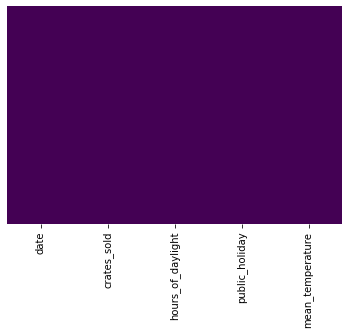

In [15]:
#Visualize the missing values through seaboarn
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [18]:
#Get relevant percentiles and see their distribution for crates_sold
data['crates_sold'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95,0.96,0.97,0.98,0.997,0.998, 1])

0.000    372.000
0.100    512.800
0.200    545.000
0.300    573.000
0.400    599.600
0.500    619.000
0.600    646.000
0.700    668.000
0.800    712.000
0.900    739.600
0.950    755.600
0.960    763.320
0.970    772.000
0.980    783.440
0.997    803.264
0.998    807.808
1.000    818.000
Name: crates_sold, dtype: float64

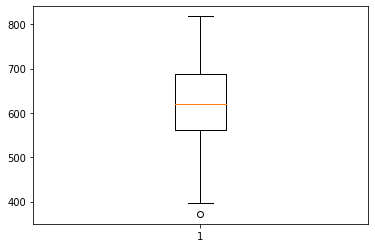

In [17]:
#Check is there any outliers in target variable ?
plt.boxplot(data.crates_sold);

Obseravtion:
    There are not outliers in the target variable

In [19]:
#Get relevant percentiles and see their distribution for hours_of_daylight
data['hours_of_daylight'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95,0.96,0.97,0.98,0.997, 1])

0.000     7.60
0.100     8.00
0.200     8.80
0.300     9.82
0.400    11.10
0.500    12.30
0.600    13.54
0.700    14.70
0.800    15.80
0.900    16.56
0.950    16.78
0.960    16.80
0.970    16.80
0.980    16.80
0.997    16.80
1.000    16.80
Name: hours_of_daylight, dtype: float64

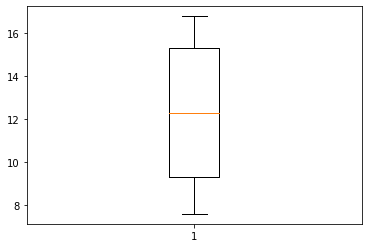

In [20]:
#Check is there any outliers in hours_of_daylight variable ?
plt.boxplot(data.hours_of_daylight);

Observation:
    There are not outliers in the hours_of_daylight variable

In [23]:
#Get relevant percentiles and see their distribution for mean_temperature
data['mean_temperature'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95,0.96,0.97,0.98,0.997, 1])

0.000    -5.6000
0.100     2.4000
0.200     4.6000
0.300     6.2000
0.400     7.8600
0.500    10.5000
0.600    13.6000
0.700    15.5000
0.800    18.2200
0.900    21.5600
0.950    23.6000
0.960    23.8880
0.970    24.6000
0.980    25.1440
0.997    27.5804
1.000    28.5000
Name: mean_temperature, dtype: float64

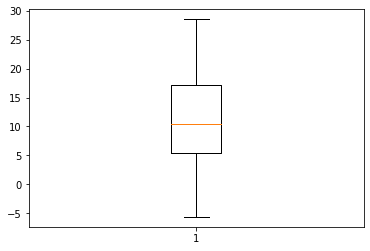

In [21]:
#Check is there any outliers in mean_temperature variable ?
plt.boxplot(data.mean_temperature);

Observation:
    There are not outliers in the mean_temperature variable

In [25]:
#Check the correlation among the variables in the data or multicollinearity
data.corr()

,crates_sold,hours_of_daylight,public_holiday,mean_temperature
crates_sold,1.000000,0.714481,0.099063,0.918799
hours_of_daylight,0.714481,1.000000,-0.002019,0.801161
public_holiday,0.099063,-0.002019,1.000000,-0.005260
mean_temperature,0.918799,0.801161,-0.005260,1.000000


Observation:
    1. hours_of_daylight and mean_temperature are highly correlated with each other

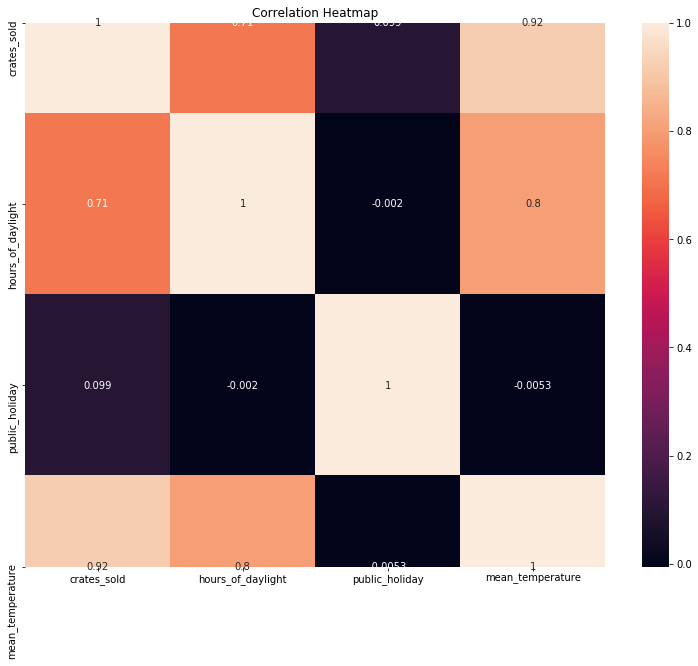

In [22]:
#Visualize the correlation in heatmap
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

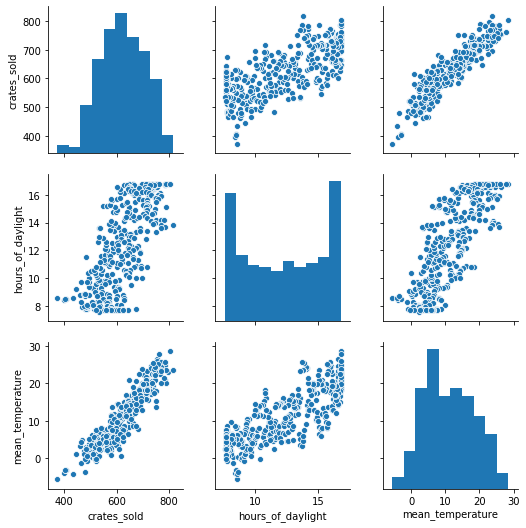

In [28]:
#Visualizing numeric variables
#Pairplot of all the numeric variables
feature_cols=["crates_sold", "hours_of_daylight", "mean_temperature"]
ax = sns.pairplot(data[feature_cols])

Observation:
    mean_temperature seems to have a poitive correlation with price

In [25]:
#Creating a new column specifies the given date is a weekday or weekend based on date column
import datetime as dt
data['day_of_week'] = pd.to_datetime(data['date']).dt.dayofweek

#0 - Monday
#1 - Tuesday
#2 - Wednesday
#3 - Thrusday
#4 - Friday
#5 - Saturday
#6 - Sunday

In [26]:
#Checking the top observations of the data
data.head(15)

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature,day_of_week
0,2019-01-01,553,7.7,1,6.4,1
1,2019-01-02,479,7.8,0,1.6,2
2,2019-01-03,485,7.8,0,-0.8,3
3,2019-01-04,484,7.8,0,1.6,4
4,2019-01-05,512,7.8,0,5.5,5
5,2019-01-06,488,7.9,0,1.5,6
6,2019-01-07,483,7.9,0,3.0,0
7,2019-01-08,467,7.9,0,4.9,1
8,2019-01-09,477,8.0,0,1.9,2
9,2019-01-10,490,8.0,0,0.9,3


In [27]:
#Change the day column values to Weekend (1) and Weekday (0)
impute_day={0:0,1:0,2:0,3:0,4:0,5:1,6:1}
impute_day

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1}

In [28]:
#Column day: 0 means weekdays and 1 means weekend
data["weekday_end"]=data["day_of_week"].map(impute_day)
data.head(10)

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature,day_of_week,weekday_end
0,2019-01-01,553,7.7,1,6.4,1,0
1,2019-01-02,479,7.8,0,1.6,2,0
2,2019-01-03,485,7.8,0,-0.8,3,0
3,2019-01-04,484,7.8,0,1.6,4,0
4,2019-01-05,512,7.8,0,5.5,5,1
5,2019-01-06,488,7.9,0,1.5,6,1
6,2019-01-07,483,7.9,0,3.0,0,0
7,2019-01-08,467,7.9,0,4.9,1,0
8,2019-01-09,477,8.0,0,1.9,2,0
9,2019-01-10,490,8.0,0,0.9,3,0


In [29]:
#Creating a month column based on the given date column
data['month'] = pd.DatetimeIndex(data['date']).month
data.head(5)


,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature,day_of_week,weekday_end,month
0,2019-01-01,553,7.7,1,6.4,1,0,1
1,2019-01-02,479,7.8,0,1.6,2,0,1
2,2019-01-03,485,7.8,0,-0.8,3,0,1
3,2019-01-04,484,7.8,0,1.6,4,0,1
4,2019-01-05,512,7.8,0,5.5,5,1,1


In [30]:
#Mapping the seasons based on the month column
#Have considered German seasons based on the below data
#German Spring: March, April, May
#German Summer: June, July, August
#German Autumn: September, October, November
#German Winter: December, January, February
spring=[3,4,5]
summer=[6,7,8]
autumn=[9,10,11]
winter=[12,1,2]

In [31]:
season_mapping={1:1,2:1,3:2,4:2,5:2,6:3,7:3,8:3,9:4,10:4,11:4,12:1}

In [33]:
#Winter = 1
#Spring = 2
#Summer = 3
#Autumn = 4
data["season"]=data["month"].map(season_mapping)
data.head(15)

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature,day_of_week,weekday_end,month,season
0,2019-01-01,553,7.7,1,6.4,1,0,1,1
1,2019-01-02,479,7.8,0,1.6,2,0,1,1
2,2019-01-03,485,7.8,0,-0.8,3,0,1,1
3,2019-01-04,484,7.8,0,1.6,4,0,1,1
4,2019-01-05,512,7.8,0,5.5,5,1,1,1
5,2019-01-06,488,7.9,0,1.5,6,1,1,1
6,2019-01-07,483,7.9,0,3.0,0,0,1,1
7,2019-01-08,467,7.9,0,4.9,1,0,1,1
8,2019-01-09,477,8.0,0,1.9,2,0,1,1
9,2019-01-10,490,8.0,0,0.9,3,0,1,1


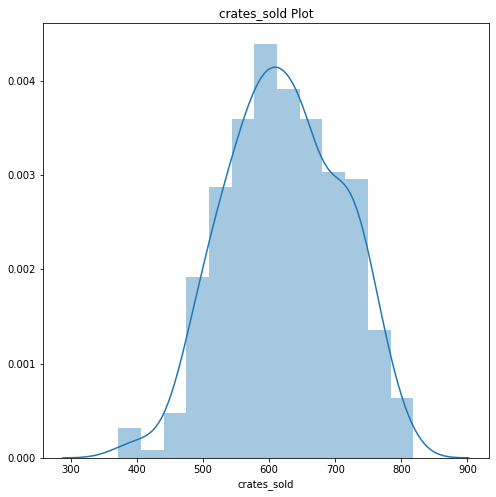

In [34]:
#check the distribution of the crates_sold
plt.figure(figsize=(8,8))
plt.title('crates_sold Plot')
sns.distplot(data['crates_sold'])

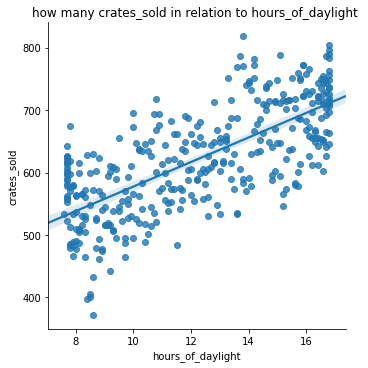

In [35]:
#Check the relationship between crates_sold and hours_of_daylight
sns.lmplot(x="hours_of_daylight", y="crates_sold", data=data)
plt.title("how many crates_sold in relation to hours_of_daylight ")
plt.show()

Observation:
    1. We can see that there is a linear relationship between crates_sold and hours_of_daylight
    2. As hours_of_daylight increases, crates_sold also increasing

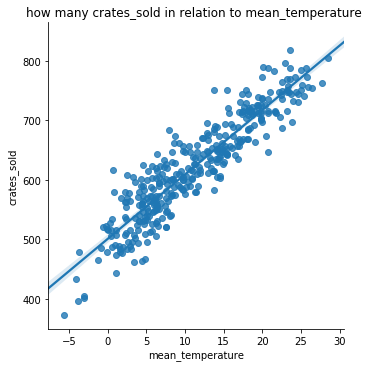

In [36]:
#Check the relationship between crates_sold and mean_temperature
sns.lmplot(x="mean_temperature", y="crates_sold", data=data)
plt.title("how many crates_sold in relation to mean_temperature ")
plt.show()

Observation:

1. We can see that there is a exact linear relationship between crates_sold and mean_temperature
2. mean_temperature seems to have a poitive correlation with crates_sold as mean_temperature increases, sales also increases


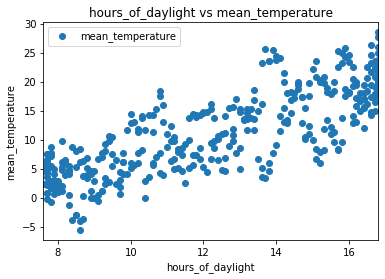

In [41]:
#hours_of_daylight vs mean_temperature
data.plot(x='hours_of_daylight', y='mean_temperature', style='o')  
plt.title('hours_of_daylight vs mean_temperature')  
plt.xlabel('hours_of_daylight')  
plt.ylabel('mean_temperature')  
plt.show()

Observation:
    As the hours_of_daylight increases, mean_temperature also increases

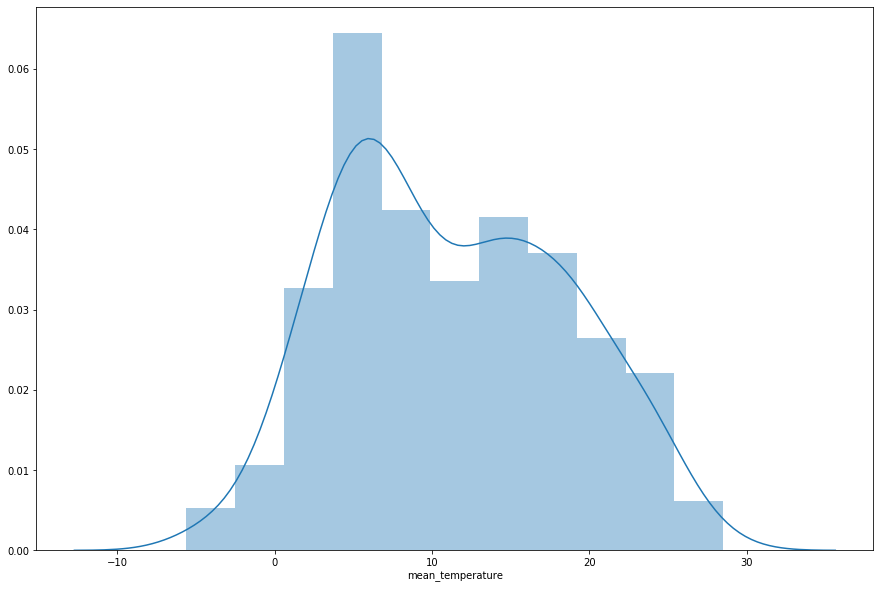

In [37]:
#Check the distribution of mean_temperature
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['mean_temperature'])

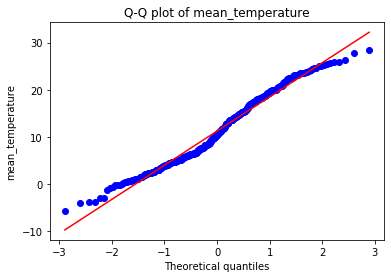

In [38]:
#mean_temperature distribution
import scipy.stats as stats
stats.probplot(data.mean_temperature, dist="norm", plot=plt)
plt.ylabel("mean_temperature")
plt.title("Q-Q plot of mean_temperature")
plt.show()

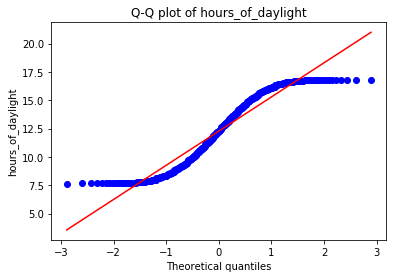

In [39]:
#hours_of_daylight distribution
import scipy.stats as stats
stats.probplot(data.hours_of_daylight, dist="norm", plot=plt)
plt.ylabel("hours_of_daylight")
plt.title("Q-Q plot of hours_of_daylight")
plt.show()

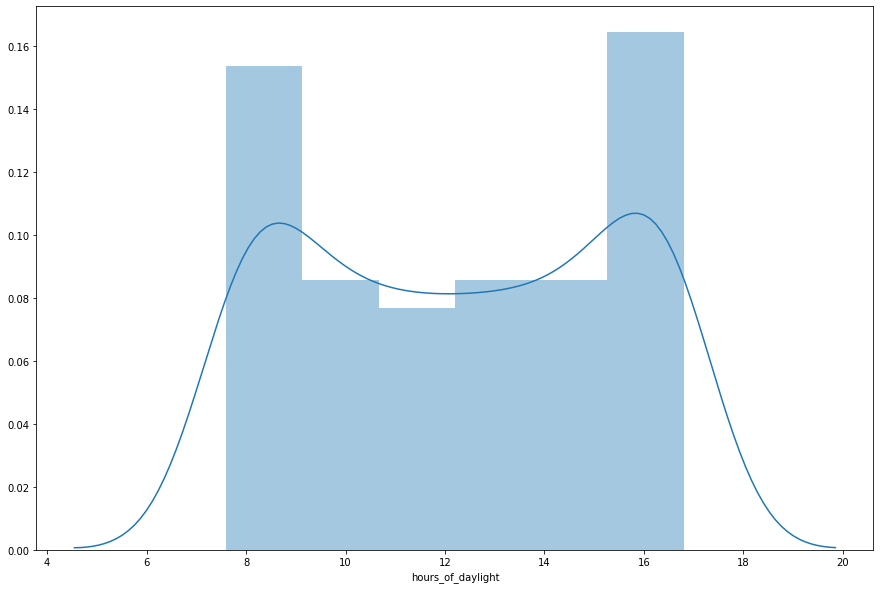

In [40]:
#Check the distribution of hours_of_daylight
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['hours_of_daylight'])

In [41]:
#What are the max min values of the mean_temperature?
print(data.mean_temperature.max())
print(data.mean_temperature.min())

28.5
-5.6


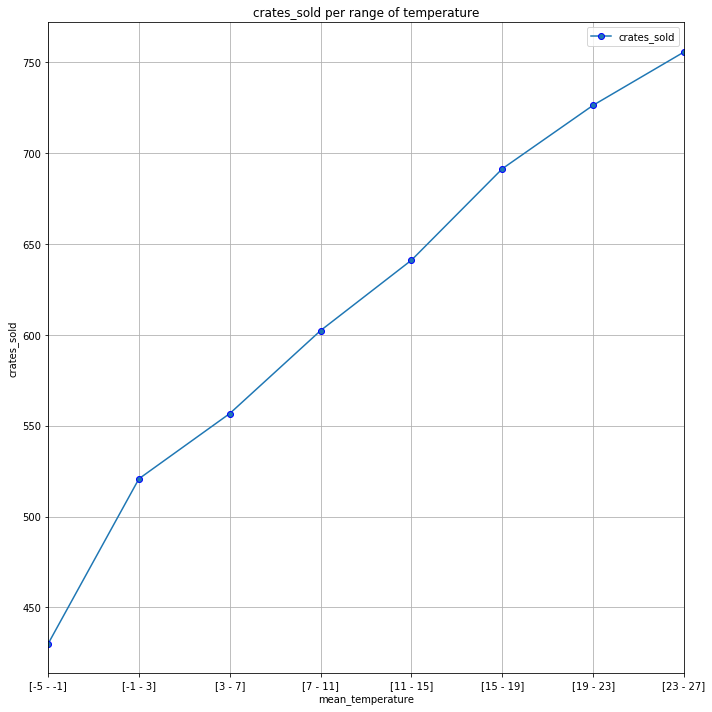

In [42]:
#Which range of temperature is contributing more crates_sales?
data.columns
bins = np.arange(-5,30,4)
bins_temp = bins.astype(str)
labels = []
count1=0
count2=1
while count2 != len(bins_temp):
    labels.append('['+bins_temp[count1]+' - '+bins_temp[count2]+']')
    count1+=1
    count2+=1

ind = np.arange(len(labels))

temp = pd.cut(data['mean_temperature'], bins)

pivot_table_temp = data.pivot_table('crates_sold',temp)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
pivot_table_temp.plot(ax=ax, marker='o', markeredgecolor='b')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_ylabel('crates_sold')
ax.set_title('crates_sold per range of temperature')
ax.grid(b=True, which='major', linestyle='-')
plt.tight_layout()

Observation:
    1. As the temperature increases, sales also increases (Higher the temperature, Higher the sales)

In [48]:
#Check the crates_sold on weekdays and weekends at overall level
weekdays=sum(data.crates_sold[data.weekday_end==0])
weekends=sum(data.crates_sold[data.weekday_end==1])
labels = ['crates_sold on Weekdays','crates sold on weenend']
values = [weekdays,weekends]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Sample of weekly crates_sold')
fig.show()



Observation:
    1. crates_sold on weekdays is higher than weekends but there is not big difference in average sales on weekdays and weekends (i.e. 0.4% ).

In [43]:
#Check the crates_sold on weekdays and weekends per day
weekdays1=sum(data.crates_sold[data.weekday_end==0])/(365-96)
weekends1=sum(data.crates_sold[data.weekday_end==1])/(365-269)
days=["Weekdays","Weekend day"]
fig=go.Figure([go.Bar(x=days,y=[weekdays1,weekends1])])
fig.update_layout(title='Sample of daily crates_sold  ',
                   xaxis_title='Days',
                   yaxis_title='crates_sold')
fig.show()


In [44]:
dayNameFromWeekday={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
dayNameFromWeekday

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [45]:
data["day_of_week"]=data["day_of_week"].map(dayNameFromWeekday)
data.head(5)

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature,day_of_week,weekday_end,month,season
0,2019-01-01,553,7.7,1,6.4,Tuesday,0,1,1
1,2019-01-02,479,7.8,0,1.6,Wednesday,0,1,1
2,2019-01-03,485,7.8,0,-0.8,Thursday,0,1,1
3,2019-01-04,484,7.8,0,1.6,Friday,0,1,1
4,2019-01-05,512,7.8,0,5.5,Saturday,1,1,1


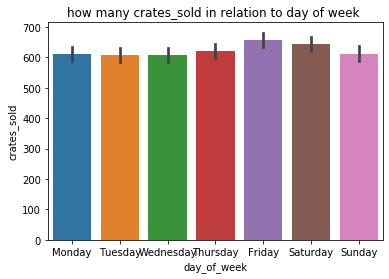

In [46]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#Check the distribution between day of week and crates_sold
sns.barplot(x="day_of_week", y="crates_sold", order=order, data=data)
plt.title("how many crates_sold in relation to day of week ")
plt.show()

Observation:
    It seems there is a higher sales on Friday as most of the people are partying on Friday night since it is a weekend

In [47]:
#Check the crates_sold on public_holiday vs normal day
normal_day=sum(data.crates_sold[data.public_holiday==0])
holiday=sum(data.crates_sold[data.public_holiday==1])
days=["normal_day","holiday"]
fig=go.Figure([go.Bar(x=days,y=[normal_day,holiday])])
fig.update_layout(title='Sample of crates_sold on public holidays vs normal days  ',
                   xaxis_title='Days',
                   yaxis_title='crates_sold')
fig.show()

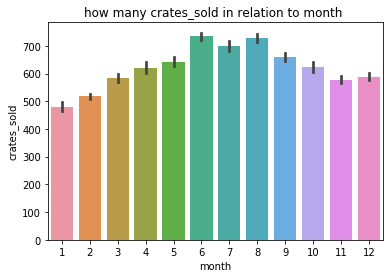

In [48]:
#Check the distribution between month and crates_sold
sns.barplot(x="month", y="crates_sold", data=data)
plt.title("how many crates_sold in relation to month ")
plt.show()

Observation:
    1. crates_sold is high during June, July & August months compared to other months and it is due to higher temperature during summer
    2. crates_sold is low during January compared to other months and it is due to lower temperature during winter

In [49]:
#Changing season column from numbers to text
season_mapping={1:"winter",2:"spring",3:"summer",4:"autumn"}
data["season"]=data["season"].map(season_mapping)
data.head(15)

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature,day_of_week,weekday_end,month,season
0,2019-01-01,553,7.7,1,6.4,Tuesday,0,1,winter
1,2019-01-02,479,7.8,0,1.6,Wednesday,0,1,winter
2,2019-01-03,485,7.8,0,-0.8,Thursday,0,1,winter
3,2019-01-04,484,7.8,0,1.6,Friday,0,1,winter
4,2019-01-05,512,7.8,0,5.5,Saturday,1,1,winter
5,2019-01-06,488,7.9,0,1.5,Sunday,1,1,winter
6,2019-01-07,483,7.9,0,3.0,Monday,0,1,winter
7,2019-01-08,467,7.9,0,4.9,Tuesday,0,1,winter
8,2019-01-09,477,8.0,0,1.9,Wednesday,0,1,winter
9,2019-01-10,490,8.0,0,0.9,Thursday,0,1,winter


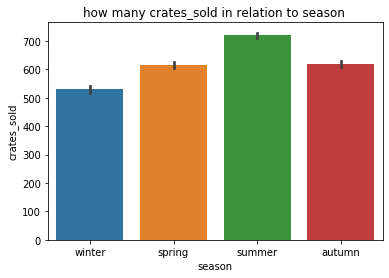

In [50]:
order=["winter", "spring", "summer", "autumn"]
#Check the distribution between season and crates_sold
sns.barplot(x="season", y="crates_sold", order=order, data=data)
plt.title("how many crates_sold in relation to season ")
plt.show()

Observation:
    Crates_sold during summer is higher compared to other seasons since the temperature is high during this season
    Crates_sold during winter is lower compared to other seasons since the temperature is low during this season

In [51]:
data.columns

Index(['date', 'crates_sold', 'hours_of_daylight', 'public_holiday',
       'mean_temperature', 'day_of_week', 'weekday_end', 'month', 'season'],
      dtype='object')

In [53]:
#Dropping the unnecessary variables
data1=data.drop(["date", "day_of_week", "month", "season","weekday_end"], axis=1)
data1.columns

Index(['crates_sold', 'hours_of_daylight', 'public_holiday',
       'mean_temperature'],
      dtype='object')

In [54]:
#Check the multicolleinearity amonng the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data1.drop("crates_sold", axis=1)
vif_data.columns
vif_data.head(5)

,hours_of_daylight,public_holiday,mean_temperature
0,7.7,1,6.4
1,7.8,0,1.6
2,7.8,0,-0.8
3,7.8,0,1.6
4,7.8,0,5.5


In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,hours_of_daylight,6.64
2,mean_temperature,6.59
1,public_holiday,1.03


Observation:
    mean_temperature and hours_of_daylight are strogly correlated with each other hence dropping the hours_of_daylight variable
    to avoid multicollinearity issues

In [61]:
#Splitting the Dataset into the Independent variable set and dependent variable set
feature_cols=["mean_temperature","public_holiday"]
X=data[feature_cols]
#X=pd.get_dummies(X, columns=["public_holiday"], drop_first=False)
#from sklearn.preprocessing import StandardScaler
X.columns
y=data["crates_sold"]
print(X.shape)
print(y.shape)
print(X.columns)

(365, 2)
(365,)
Index(['mean_temperature', 'public_holiday'], dtype='object')


In [62]:
#Splitting the Dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((292, 2), (73, 2), (292,), (73,))

# MODEL BUILDING

Comparing models

In [63]:
# Multiple linear regresssion
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model_mlr=lr.fit(X_train,y_train)

In [64]:
#Predict the train set and check the training accuracy
y_train_pred=model_mlr.predict(X_train)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)

Train_results_mlr = pd.DataFrame([['TrainSet_Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [65]:
Train_results_mlr

,Model,MAE,MSE,RMSE,R2 Score
0,TrainSet_Multiple Linear Regression,25.368938,1002.064959,31.65541,0.860891


In [66]:
#Predict the test set and check the test accuracy
y_test_pred=model_mlr.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)

results_test_mlr = pd.DataFrame([['TestSet_Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [67]:
results_test_mlr

,Model,MAE,MSE,RMSE,R2 Score
0,TestSet_Multiple Linear Regression,28.956974,1324.983317,36.40032,0.830795


# Interpreting model coefficients

In [68]:
# print the intercept and coefficients
print(model_mlr.intercept_)
print (np.around(model_mlr.coef_, decimals=3))

498.3992650145371
[10.804 56.479]


In [69]:
# pair the feature names with the coefficients
list(zip(feature_cols, model_mlr.coef_))

[('mean_temperature', 10.803828394265162),
 ('public_holiday', 56.47883883573237)]

Compute the equation based on the above values

EQUATION:

Y_Prediction=498.39 + 10.8 (mean_temperature) + 56.47 (public_holiday)

# CHECKING THE LINEAR REGRESSION ASSUMPTIONS

Note: Multicollenearity and linear relationship already checked above

1. NORMALITY OF RESIDUALS

Text(0.5, 1.0, 'Residuals Probability Plot')

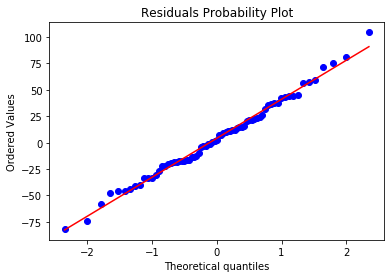

In [70]:
#Check whether the residuals are normally distributed or not
residuals=y_test - y_test_pred
stats.probplot(residuals, plot= plt)
plt.title("Residuals Probability Plot")

Observation:
    
    Residuals are normally distributed

2. HOMOSCEDASTICITY OR CONSTANT VARIANCE OF ERRORS

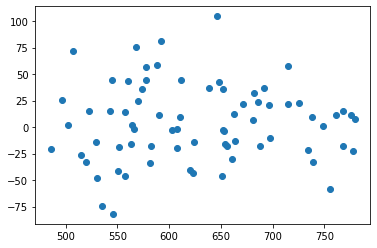

In [71]:
#Checking the homoscedasticity
plt.scatter(y_test_pred, residuals)
plt.show()

Observation:
    There is no pattern identified between residuals and predicted values i.e. for example increase in variance with respect to increase
    in overall y prediction

3. LITTLE OR NO AUTOCORRELATION AMONG THE RESIDUALS

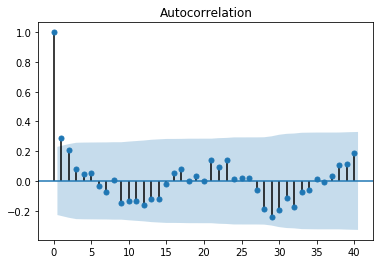

In [72]:
#Check the autocorrelation among the residuslls
import statsmodels.tsa.api as smt
auto = smt.graphics.plot_acf(residuals, lags=40 , alpha=0.05)
auto.show()

Observation:
    
    It seems there is a autocorrelation among the residuals and  it is very low. 
    To detect it, let's perfrom Durbin-Watson test
    to determine whether it is possitive or negative correlation

# Durbin-Watson test statistic = 2, indicatess no autocorrelation
# 0 < Durbin-Watson test statistic < 2 => indicates positive autocorrelation
# 2 < Durbin-Watson test statistic < 4 => indicates negative autocorrelation.

In [73]:
#Perform the Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals,axis=0)

1.3446893905919326

In [74]:
#It seems there is possitive autocorrelation and simple way to fix this by adding lag variables but it is not a time series problem.
#Another way to fix this is by adding some variables or by doing variable transformations.

In [75]:
## Suport Vector Regression 
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'linear')
model_svr=svr_regressor.fit(X_train, y_train)

In [76]:
#Predict the train set and check the training accuracy
y_train_pred=model_svr.predict(X_train)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)

Train_results_svr = pd.DataFrame([['TrainSet_Support Vector Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [77]:
Train_results_svr

,Model,MAE,MSE,RMSE,R2 Score
0,TrainSet_Support Vector Regression,26.156028,1085.538248,32.947507,0.849303


In [78]:
# Predicting Test Set
y_test_pred = model_svr.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)

results_test_svr = pd.DataFrame([['TestSet_Support Vector Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])


In [79]:
results_test_svr

,Model,MAE,MSE,RMSE,R2 Score
0,TestSet_Support Vector Regression,30.246855,1421.011051,37.6963,0.818532


Observation:

    "rbf" kernel is giving very low accuracy i.e. 31.08 (Training Data) and 27.43 (Test Data)
    "linear" kernel is working well for this data and giving maximum accuracy
    

In [80]:
## Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
model_dtr=dt_regressor.fit(X_train, y_train)

In [81]:
#Predict the train set and check the training accuracy
y_train_pred=model_dtr.predict(X_train)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)

Train_results_dtr = pd.DataFrame([['TrainSet_Decision Tree Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [82]:
Train_results_dtr

,Model,MAE,MSE,RMSE,R2 Score
0,TrainSet_Decision Tree Regression,12.359703,379.957705,19.492504,0.947253


In [83]:
# Predicting Test Set
y_test_pred = model_dtr.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)

results_test_dtr = pd.DataFrame([['TestSet_Decision Tree Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [84]:
results_test_dtr

,Model,MAE,MSE,RMSE,R2 Score
0,TestSet_Decision Tree Regression,33.489726,1776.066305,42.143402,0.77319


Observation:

    Decision Tree model is overfitting as there is more difference between Training and Test accuracy
    and need to do hyperparameters tuning to find the best parameters to avoid overfitting.

In [85]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=0)
model_rfr=rf_regressor.fit(X_train,y_train)



In [86]:
#Predict the train set and check the training accuracy
y_train_pred=model_rfr.predict(X_train)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)

Train_results_rfr = pd.DataFrame([['TrainSet_Random Fores Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [87]:
Train_results_rfr

,Model,MAE,MSE,RMSE,R2 Score
0,TrainSet_Random Fores Regression,17.237035,510.472194,22.593632,0.929135


In [88]:
# Predicting Test Set
y_test_pred = model_rfr.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)

results_test_rfr = pd.DataFrame([['TestSet_Random Forest Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [89]:
results_test_rfr

,Model,MAE,MSE,RMSE,R2 Score
0,TestSet_Random Forest Regression,30.866166,1509.276742,38.849411,0.80726


Observation:

    Random forest model is overfitting as there is more difference between Training and Test accuracy
    and need to do hyperparameters tuning to find the best parameters to avoid overfitting.

In [90]:
#Appending all the above model results to compare
final_results=pd.concat([Train_results_mlr, results_test_mlr, Train_results_svr, results_test_svr, Train_results_dtr, results_test_dtr, Train_results_rfr, results_test_rfr], ignore_index=True)

In [91]:
final_results

,Model,MAE,MSE,RMSE,R2 Score
0,TrainSet_Multiple Linear Regression,25.368938,1002.064959,31.655410,0.860891
1,TestSet_Multiple Linear Regression,28.956974,1324.983317,36.400320,0.830795
2,TrainSet_Support Vector Regression,26.156028,1085.538248,32.947507,0.849303
3,TestSet_Support Vector Regression,30.246855,1421.011051,37.696300,0.818532
4,TrainSet_Decision Tree Regression,12.359703,379.957705,19.492504,0.947253
5,TestSet_Decision Tree Regression,33.489726,1776.066305,42.143402,0.773190
6,TrainSet_Random Fores Regression,17.237035,510.472194,22.593632,0.929135
7,TestSet_Random Forest Regression,30.866166,1509.276742,38.849411,0.807260


Among all the above models, Multiple linear regression is giving the best accuracy

# INSIGHTS

1. mean_temperature and hours_of_daylight are impacting the beer sales
2. Along with the mean_temperature, weekend (Friday) and climate conditions (i.e. spring, summer, autumn & winter) are
   effecting the beer sales. Beer sales are high during the summer compared to other seasons and lower during winter compared      to other seasons
3. Along with the above, there are some other parameters that effect the beer sales as mentioned below.

     a) Age
     b) Gender
     c) Alcohol percentage
     d) Taste
     e) Brand